<font size="20">

# LET measurements, April 2020

<font size="3">
    
> __Author:__ A. Backis
<br/>__Institute:__ European Spallation Source (ESS), University of Glasgow (UoG)
<br/>__Date:__ 4/3-2020

_Abstract:_
This notebook contains the data-analysis tools used for the measurements at the LET instrument at ISIS. It describes how the analysis was performed, and summarizes the results.

# Contents
    
* [1. Introduction](#INTRODUCTION)
    * [1.1 Packages](#PACKAGES)
    * [1.2 Global parameters](#PACKAGES)
* [2. Data](#DATA)
    * [2.1 Descriptions](#EXTRACT)
    * [2.2 Paths](#LOAD)
    * [2.3 Extract](#FILTER)
    * [2.4 Load](#FILTER)
    * [2.5 Filter](#FILTER)
    * [2.6 Plotting](#DATA)
* [4. Utgård](#DATA)
* [Acknowledgements](#ACKNOWLEDGEMENTS)
* [References](#REFERENCES)

# 1. Introduction

This notebook summarizes the details of the measurements performed at the LET instrument, at ISIS, England. The notebook contains all details on the preparations leading up to the beam time on the 28:th and 29:th April 2020. This includes preparations at Utgård and initial background testing at ISIS.

## 1.1 Packages<a class="anchor" id="PACKAGES"></a>

In [66]:
# Autoload packages when doing an external change
%load_ext autoreload
%autoreload 2

# General packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Data handling
import mg.file_handling.read as mg_read

# Plotting
import mg_new.basic_plot as mg_basic_plot
import mg.plotting.advanced_plot as mg_advanced_plot

# Helper functions
import mg.helper_functions.misc as mg_hf

# Make matplotlib interactive mode in notebook
%matplotlib inline
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1.2 Global parameters

In [40]:
US_TO_TDC = 1 / (62.5e-9 * 1e6)
H_TO_TDC = 1 / ((62.5e-9) * 60*60)
RAW_FOLDER = '../data/let/raw/'
PROCESSED_FOLDER = '../data/let/processed/'

# 2. Data

## 2.1 Descriptions<a class="anchor" id="EXTRACT"></a>

**Utgård - previous measurements**

previous_1:
> *Description*: SEQUOIA I background measurement, pure Aluminum
<br/>
<br/> *Setup*: SEQUOIA I, horizontal, unshielded.
<br/>
<br/> *Date*: 13/5-2019
<br/>
<br/> *Duration*: ~68h
<br/>
<br/> *Notes*: Part of the measurements series Anton did during summer 2019

previous_2:
> *Description*: SEQUOIA I background measurement, pure Aluminum
<br/>
<br/> *Setup*: SEQUOIA I, horizontal, shielded inside mirrobor+polyethylene cave
<br/>
<br/> *Date*: 17/6-2019
<br/>
<br/> *Duration*: ~114h
<br/>
<br/> *Notes*: Part of the measurements series Anton did during summer 2019

previous_3:
> *Description*: SEQUOIA I background measurement, with both pure Aluminum and natural Aluminum
<br/>
<br/> *Setup*: SEQUOIA I, vertical, unshielded. Two detectors.
<br/>
<br/> *Date*: 4/9-2019
<br/>
<br/> *Duration*: ~45h
<br/>
<br/> *Notes*: Part of the measurements series Anton did during summer 2019


previous_4:
> *Description*: First measurement with the SEQUOIA II column. SEQUOIA I column run simulataneoulsy.
<br/>
<br/> *Setup*: SEQUOIA II, horizontal, unshielded.
<br/>
<br/> *Date*: 22/10-2019
<br/>
<br/> *Notes*: Seems a bit noisy

previous_5:
> *Description*: Measurement with SEQUOIA II column. SEQUOIA I column run simulataneoulsy.
<br/>
<br/> *Setup*: SEQUOIA I, horizontal, unshielded
<br/>
<br/> *Date*: 20/11-2019
<br/>
<br/> *Notes*:

previous_6:
> *Description*: Measurement with SEQUOIA II column. SEQUOIA I column run simulataneoulsy.
<br/>
<br/> *Setup*: SEQUOIA I, horizontal, Mirrorbor shielding front and back
<br/>
<br/> *Date*: 22/11-2019
<br/>
<br/> *Notes*:

previous_7:
> *Description*: Measurement with SEQUOIA II column, voltage at approximately 1.3kV.
<br/>
<br/> *Setup*: SEQUOIA II, horizontal, Mirrorbor+polyethylene shielding front and back
<br/>
<br/> *Date*: 5/12-2019
<br/>
<br/> *Notes*:

previous_8:
> *Description*: Measurement with SEQUOIA I, voltage at normal 1.1kV
<br/>
<br/> *Setup*: SEQUOIA I, horizontal, inside new cave
<br/>
<br/> *Date*: 9/12-2019
<br/>
<br/> *Notes*:


**Utgård - preparation measurements**

utgard_run_1: SEQUOIA I & II, horizontal, mirrobor shielding front + sides
> e-log: https://stf02.nuclear.lu.se/MG.CSPEC/103

**LET - preparation measurements**

let_test_run_1: 
> *Description*: 
<br/>
<br/> *Setup*: 
<br/>
<br/> *Date*: 
<br/>
<br/> *Notes*: 

**LET - beam time**

let_beam_run_1:
> *Description*: 
<br/>
<br/> *Setup*: 
<br/>
<br/> *Date*: 
<br/>
<br/> *Notes*: 


## 2.2 Paths<a class="anchor" id="EXTRACT"></a>

In [181]:
''' Declare paths to data '''
# UTGÅRD - PREVIOUS MEASUREMENTS
PREVIOUS_PATHS = {'previous_run_1': RAW_FOLDER + 'mvmelst_042_noShielding_68h.zip',
                  'previous_run_2': RAW_FOLDER + 'mvmelst_045_Shielding_1100V_114h22m.zip',
                  'previous_run_3': RAW_FOLDER + 'mvmelst_078_2det_45h56m_1vertical.zip',
                  
                  'previous_run_4': RAW_FOLDER + 'mvmelst_171_191018_130129_First_SEQUOIA_II_Meauserement.zip',
                  'previous_run_5': RAW_FOLDER + 'mvmelst_179_191118_065800_SEQUOIA_II_18_11_2019_to_20_11_2019_no_mirrorbor_shielding.zip',
                  'previous_run_6': RAW_FOLDER + 'mvmelst_181_191120_100402_SEQUOIA__II_20_11_2019_to_22_11_2019_mirrorbor_shielding_top_and_bottom.zip',
                  'previous_run_7': RAW_FOLDER + 'mvmelst_188_191203_101632_SEQUOIA_II_1350_V_03_12_2019_to_05_12_2019_SEQUOIA_II_shielded_with_polyethylene_and_mirrorbor_sides_and_front.zip',
                  'previous_run_8': RAW_FOLDER + 'mvmelst_189_191205_093810_SEQUOIA_I_06_12_2019_to_09_12_2019_inside_new_cave.zip'
                  }      

# UTGÅRD - PREPARATION MEASUREMENTS
UTGARD_PATHS = {'utgard_run_1': RAW_FOLDER + 'mvmelst_191_200305_111506_utgard_first_run.zip',
                'utgard_run_2': RAW_FOLDER + 'mvmelst_193_200306_040827_mirrobor_covering_front_and_sides.zip',
                'utgard_run_3': RAW_FOLDER + 'mvmelst_194_200307_102939_unshielded.zip'
                }      

## 2.3 Extract<a class="anchor" id="EXTRACT"></a>

In [4]:
def extract_mg_data(zipped_path, clusters_save_path, events_save_path):
    unzipped_path = mg_read.unzip_data(zipped_path)
    data = mg_read.import_data(unzipped_path)
    # Extract clusters and save to disc
    clusters = mg_read.extract_clusters(data)
    mg_read.save_data(clusters, clusters_save_path)
    clusters = None
    # Extract events and save to disc
    events = mg_read.extract_events(data)
    mg_read.save_data(events, events_save_path)
    events = None
    # Clear data
    data = None

In [43]:
# Extract data, cluster, and save to file
def extract_and_save(run, raw_path):
    clusters_path = PROCESSED_FOLDER + run + '_clu.h5'
    events_path = PROCESSED_FOLDER + run + '_ev.h5'
    extract_mg_data(raw_path, clusters_path, events_path)

### Extract data

In [182]:
# UTGÅRD - PREVIOUS MEASUREMENTS
#extract_and_save('previous_run_1', PREVIOUS_PATHS['previous_run_1'])
#extract_and_save('previous_run_2', PREVIOUS_PATHS['previous_run_2'])
#extract_and_save('previous_run_3', PREVIOUS_PATHS['previous_run_3'])
#extract_and_save('previous_run_4', PREVIOUS_PATHS['previous_run_4'])
#extract_and_save('previous_run_5', PREVIOUS_PATHS['previous_run_5'])
#extract_and_save('previous_run_6', PREVIOUS_PATHS['previous_run_6'])
#extract_and_save('previous_run_7', PREVIOUS_PATHS['previous_run_7'])
#extract_and_save('previous_run_8', PREVIOUS_PATHS['previous_run_8'])

# UTGÅRD - PREPARATION MEASUREMENTs
extract_and_save('utgard_run_1', UTGARD_PATHS['utgard_run_1'])
extract_and_save('utgard_run_2', UTGARD_PATHS['utgard_run_2'])
extract_and_save('utgard_run_3', UTGARD_PATHS['utgard_run_3'])

Percentage: 0
Percentage: 94
Percentage: 0
Percentage: 94
Percentage: 0
Percentage: 16
Percentage: 33
Percentage: 49
Percentage: 66
Percentage: 82
Percentage: 99
Percentage: 0
Percentage: 16
Percentage: 33
Percentage: 49
Percentage: 66
Percentage: 82
Percentage: 99
Percentage: 0
Percentage: 8
Percentage: 16
Percentage: 23
Percentage: 31
Percentage: 39
Percentage: 47
Percentage: 54
Percentage: 62
Percentage: 70
Percentage: 78
Percentage: 85
Percentage: 93
Percentage: 0
Percentage: 8
Percentage: 16
Percentage: 23
Percentage: 31
Percentage: 39
Percentage: 47
Percentage: 54
Percentage: 62
Percentage: 70
Percentage: 78
Percentage: 85
Percentage: 93


## 2.4 Load<a class="anchor" id="LOAD"></a>

In [56]:
# Load clusters and events
def load_clusters_and_events(run):
    clusters_path = PROCESSED_FOLDER + run + '_clu.h5'
    events_path = PROCESSED_FOLDER + run + '_ev.h5'
    return mg_read.load_data(clusters_path), mg_read.load_data(events_path)

### Load data

In [183]:
# UTGÅRD - PREVIOUS MEASUREMENTS
#clu_previous_run_1, ev_previous_run_1 = load_clusters_and_events('previous_run_1')
#clu_previous_run_2, ev_previous_run_2 = load_clusters_and_events('previous_run_2')
#clu_previous_run_3, ev_previous_run_3 = load_clusters_and_events('previous_run_3')
#clu_previous_run_4, ev_previous_run_4 = load_clusters_and_events('previous_run_4')
#clu_previous_run_5, ev_previous_run_5 = load_clusters_and_events('previous_run_5')
#clu_previous_run_6, ev_previous_run_6 = load_clusters_and_events('previous_run_6')
#clu_previous_run_7, ev_previous_run_7 = load_clusters_and_events('previous_run_7')
#clu_previous_run_8, ev_previous_run_8 = load_clusters_and_events('previous_run_8')

# UTGÅRD - PREPARATION MEASUREMENTs
clu_utgard_run_1, ev_utgard_run_1 = load_clusters_and_events('utgard_run_1')
clu_utgard_run_2, ev_utgard_run_2 = load_clusters_and_events('utgard_run_2')
clu_utgard_run_3, ev_utgard_run_3 = load_clusters_and_events('utgard_run_3')

## 2.5 Filters<a class="anchor" id="FILTER"></a>

In [187]:
"""
Filters are declared in the following format:
{'PARAMETER': [MIN_VALUE, MAX_VALUE, IS_ACTIVATE]}
"""

# Declare filter for multi-grid clusters
mg_basic_filter = {'wm': [1, 1, True],                   # Wire multiplicity
                   'gm': [1, 5, True],                   # Grid multiplicity
                   'wadc': [600, np.inf, True],          # Wire charge
                   'gadc': [600, np.inf, True],          # Grid charge
                   'tof': [0, np.inf, True],             # Time-of-flight (TDC channels)
                   'time': [0, np.inf, True],            # Time (TDC channels)
                   'bus': [0, 8, True],                  # Bus
                   'flag': [0, 1, False],                # =1 if different buses within same coincidence
                   'layer': [0, 19, False],              # Layer, front=0 to back=19
                   'row': [0, 11, False],                # Row, right to left (seen from neutrons)
                   'gch': [80, 119, True]}               # Grid channel, bottom=80 to top=119

# Declare filter for multi-grid clusters
mg_low_adc_filter = {'wm': [1, 1, True],                   # Wire multiplicity
                   'gm': [1, 5, True],                   # Grid multiplicity
                   'wadc': [0, np.inf, True],          # Wire charge
                   'gadc': [0, np.inf, True],          # Grid charge
                   'tof': [0, np.inf, True],             # Time-of-flight (TDC channels)
                   'time': [0, np.inf, True],            # Time (TDC channels)
                   'bus': [0, 8, True],                  # Bus
                   'flag': [0, 1, False],                # =1 if different buses within same coincidence
                   'layer': [0, 19, False],              # Layer, front=0 to back=19
                   'row': [0, 11, False],                # Row, right to left (seen from neutrons)
                   'gch': [80, 119, True]}               # Grid channel, bottom=80 to top=119

## 2.6 Plotting<a class="anchor" id="FILTER"></a>

In [155]:
def plot_basic(clusters_unfiltered, events, df_filter, bus_start, bus_stop, number_rows, area):
    mg_hf.set_thick_labels(15)
    
    # Filter clusters
    clusters = mg_read.filter_data(clusters_unfiltered, df_filter)
    
    # Declare parameters
    duration = (clusters.time.values[-1] - clusters.time.values[0]) * 62.5e-9
    
    # PHS - 1D
    vmin = None
    vmax = None
    bins_phs_1d = 100
    fig = plt.figure()
    fig.set_figwidth(14)
    fig.set_figheight(4*number_rows)
    for bus in np.arange(bus_start, bus_stop+1, 1):
        plt.subplot(number_rows, 3, bus+1)
        events_bus = events[events.bus == bus]
        mg_basic_plot.phs_1d_plot(events_bus, bins_phs_1d, bus, vmin, vmax)
    plt.tight_layout()
    fig.show()
    
    # PHS - 2D
    vmin = 1
    vmax = events.shape[0] // 1000 + 100
    fig = plt.figure()
    fig.set_figwidth(14)
    fig.set_figheight(4*number_rows)
    for bus in np.arange(bus_start, bus_stop+1, 1):
        plt.subplot(number_rows, 3, bus+1)
        events_bus = events[events.bus == bus]
        if events_bus.shape[0] > 0:
            mg_basic_plot.phs_2d_plot(events_bus, bus, vmin, vmax)
    plt.tight_layout()
    fig.show()
    
    # Coincidences - 2D
    fig = plt.figure()
    fig.set_figwidth(14)
    fig.set_figheight(4*number_rows)
    if clusters.shape[0] != 0:
        vmin = 1
        vmax = clusters.shape[0] // 450 + 5
    else:
        duration = 1
        vmin = 1
        vmax = 1
    for bus in np.arange(bus_start, bus_stop+1, 1):
        plt.subplot(number_rows, 3, bus+1)
        clusters_bus = clusters[clusters.bus == bus]
        # Calculate number of events and rate in a specific bus
        number_events = clusters_bus.shape[0]
        events_per_s = number_events/duration
        events_per_s_m2 = events_per_s/area
        title = ('Bus %d\n(%d events, %.6f events/s/m$^2$)' % (bus, number_events, events_per_s_m2))
        if number_events > 0:
            mg_basic_plot.clusters_2d_plot(clusters_bus, title, vmin, vmax)
    plt.tight_layout()
    fig.show()
    
    # Coincidences - PHS
    fig = plt.figure()
    fig.set_figwidth(14)
    fig.set_figheight(4*number_rows)
    if clusters.shape[0] != 0:
        vmin = 1
        vmax = clusters.shape[0] // 450 + 1000
    else:
        duration = 1
        vmin = 1
        vmax = 1
    for bus in np.arange(bus_start, bus_stop+1, 1):
        plt.subplot(number_rows, 3, bus+1)
        clusters_bus = clusters[clusters.bus == bus]
        if clusters_bus.shape[0] > 0:
            mg_basic_plot.clusters_phs_plot(clusters_bus, bus, vmin, vmax)
    plt.tight_layout()
    fig.show()
    
    # Rate 
    number_bins = 50
    fig = plt.figure()
    fig.set_figwidth(14)
    fig.set_figheight(4*number_rows)
    for bus in np.arange(bus_start, bus_stop+1, 1):
        plt.subplot(number_rows, 3, bus+1)
        clusters_bus = clusters[clusters.bus == bus]
        mg_basic_plot.rate_plot(clusters_bus, number_bins, bus, area)
    plt.tight_layout()
    fig.show()
        

# 3. Utgård - previous measurements

## previous_run_1 (Anton, SEQ.1, unshielded, horizontal)

<IPython.core.display.Javascript object>


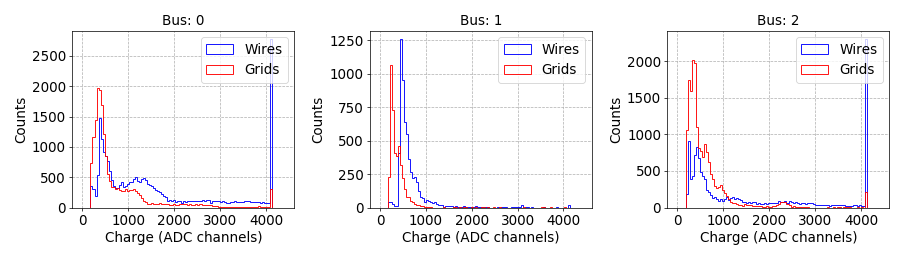

<IPython.core.display.Javascript object>


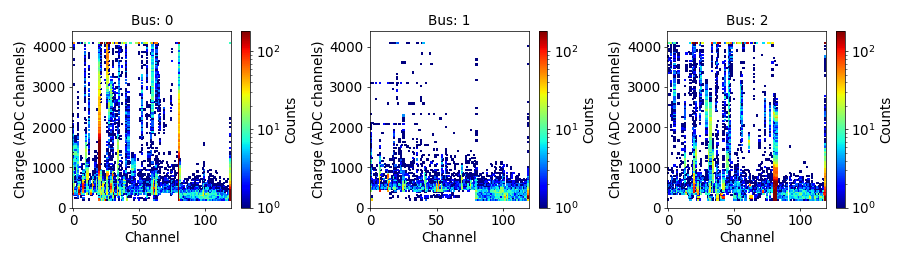

<IPython.core.display.Javascript object>


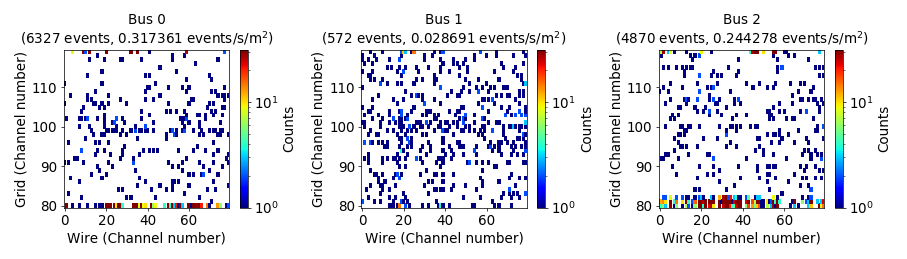

<IPython.core.display.Javascript object>


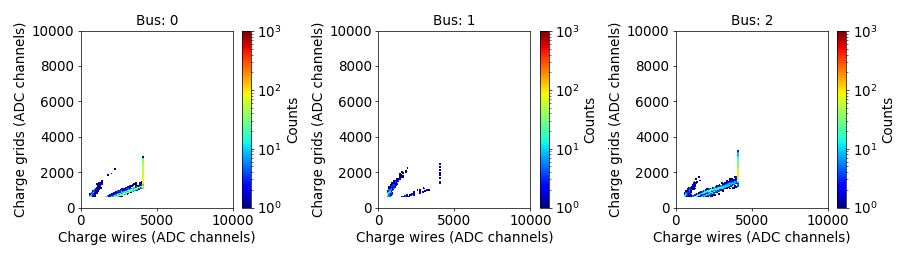

<IPython.core.display.Javascript object>


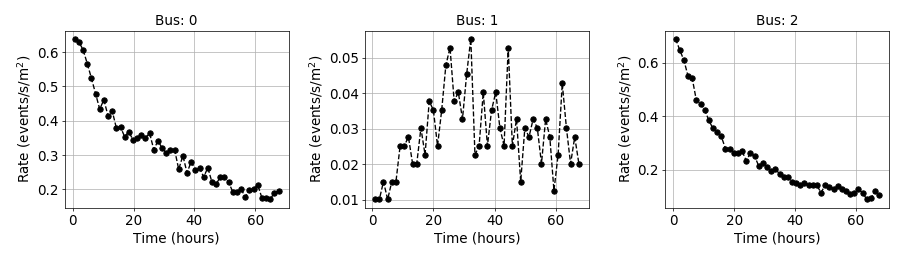

In [134]:
area = 0.0225*0.0225*4*40
plot_basic(clu_previous_run_1, ev_previous_run_1, mg_basic_filter, 0, 2, 1, area)

## previous_run_2 (Anton, SEQ.1, inside cave, horizontal)

<IPython.core.display.Javascript object>


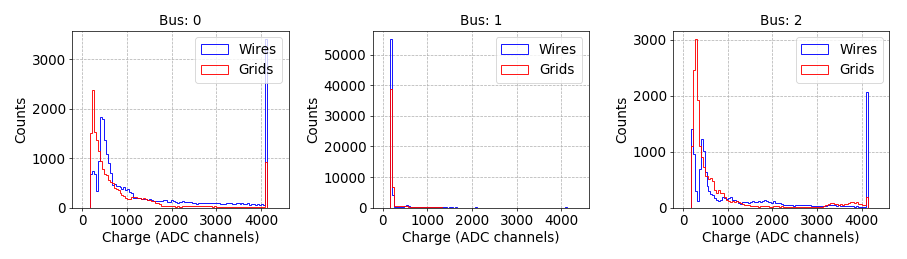

<IPython.core.display.Javascript object>


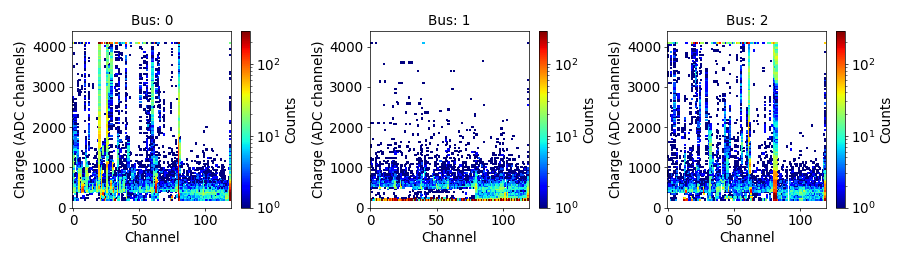

<IPython.core.display.Javascript object>


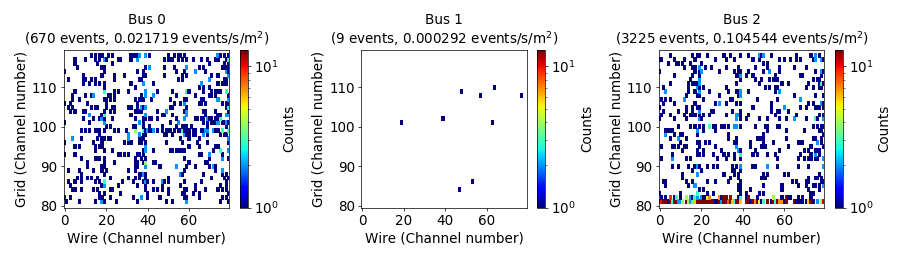

<IPython.core.display.Javascript object>


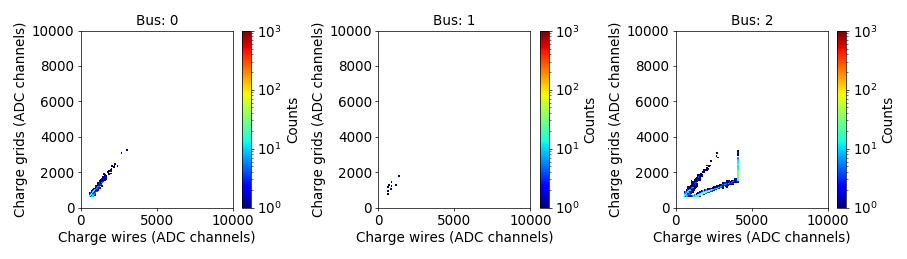

<IPython.core.display.Javascript object>


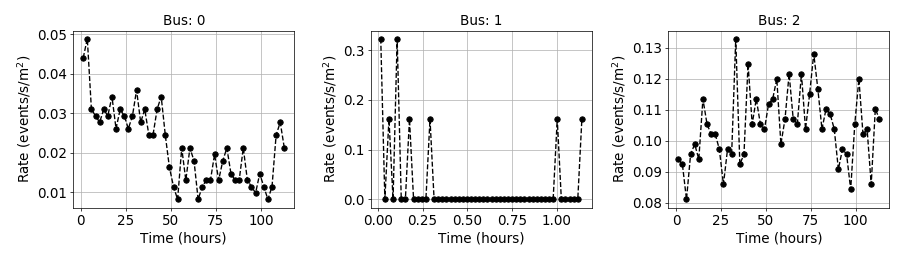

In [161]:
area = 0.0225*0.0225*4*37
clu_previous_run_2_cut = clu_previous_run_2[(clu_previous_run_2.gch >= 81) & (clu_previous_run_2.gch <= 118)]
plot_basic(clu_previous_run_2_cut, ev_previous_run_2, mg_basic_filter, 0, 2, 1, area)

## previous_run_3 (Anton, SEQ.1, unshielded, vertical)

<IPython.core.display.Javascript object>


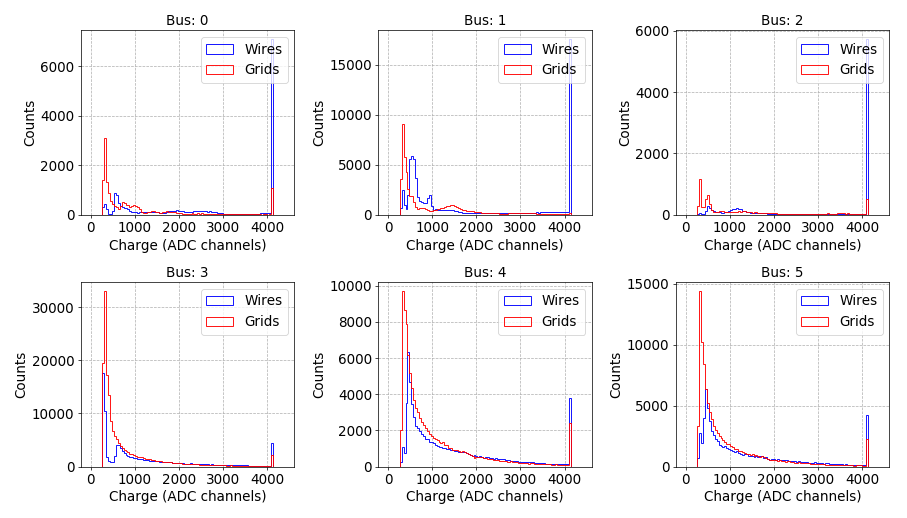

<IPython.core.display.Javascript object>


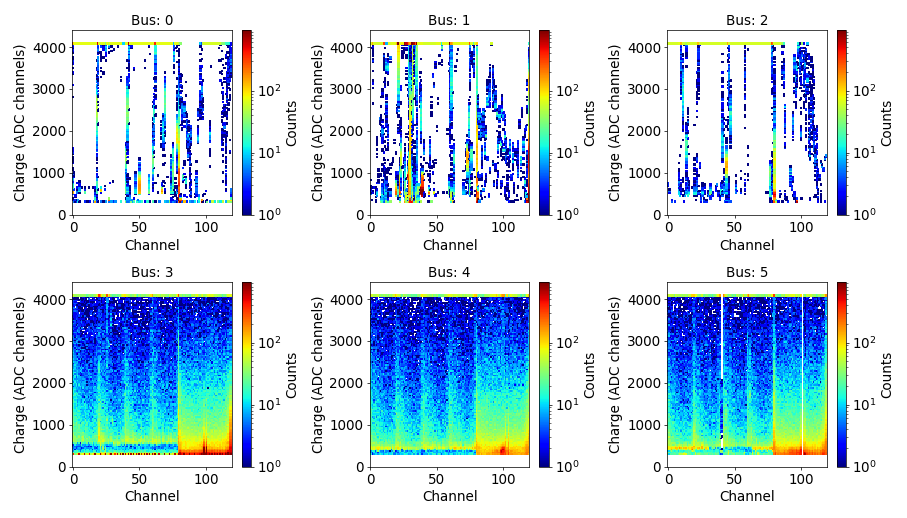

<IPython.core.display.Javascript object>


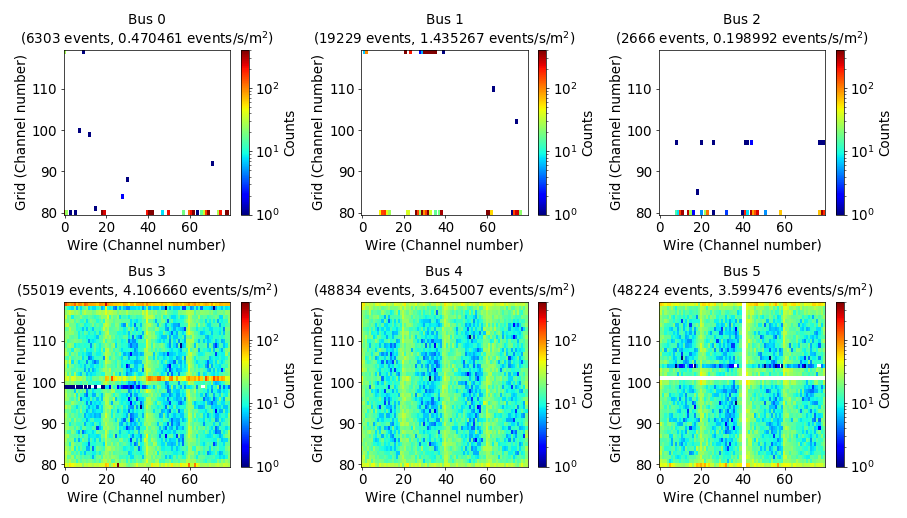

<IPython.core.display.Javascript object>


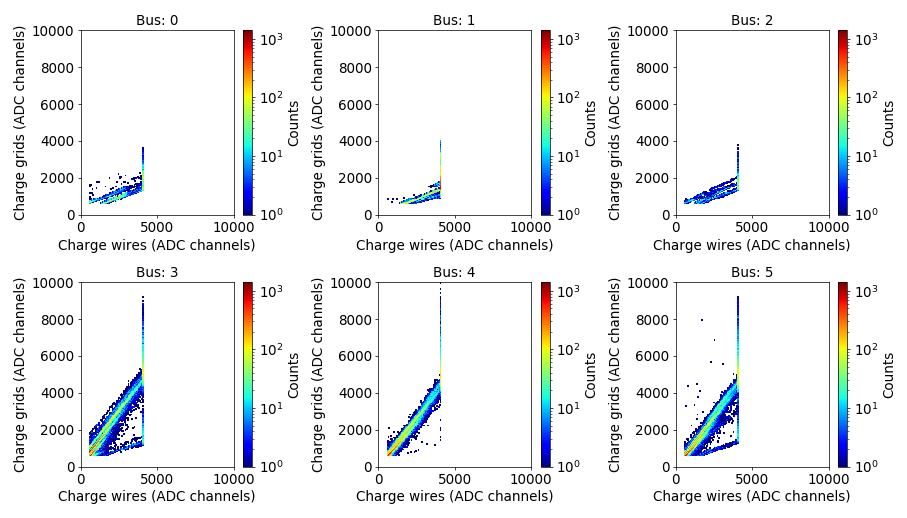

<IPython.core.display.Javascript object>


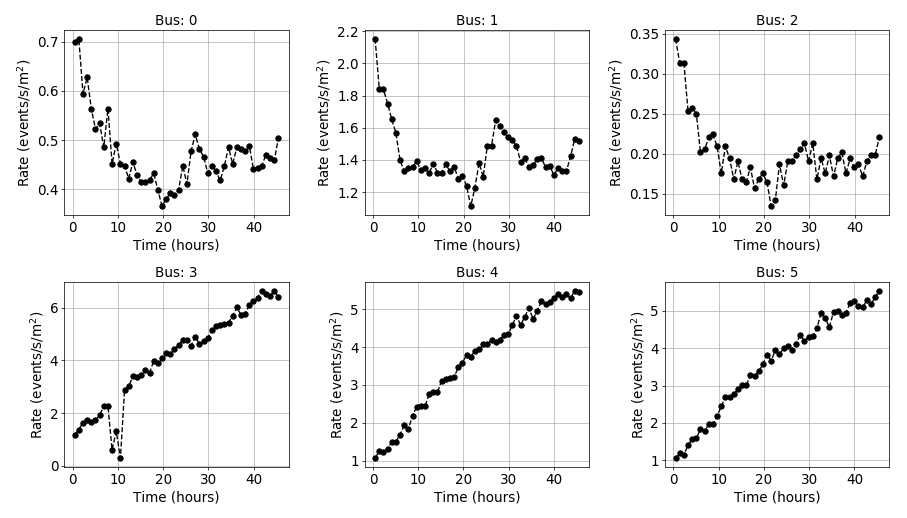

In [136]:
area = 0.0225*0.0225*4*40
plot_basic(clu_previous_run_3, ev_previous_run_3, mg_basic_filter, 0, 5, 2, area)

## previous_run_4 (SEQ.II, unshielded, horizontal, first run)

<IPython.core.display.Javascript object>


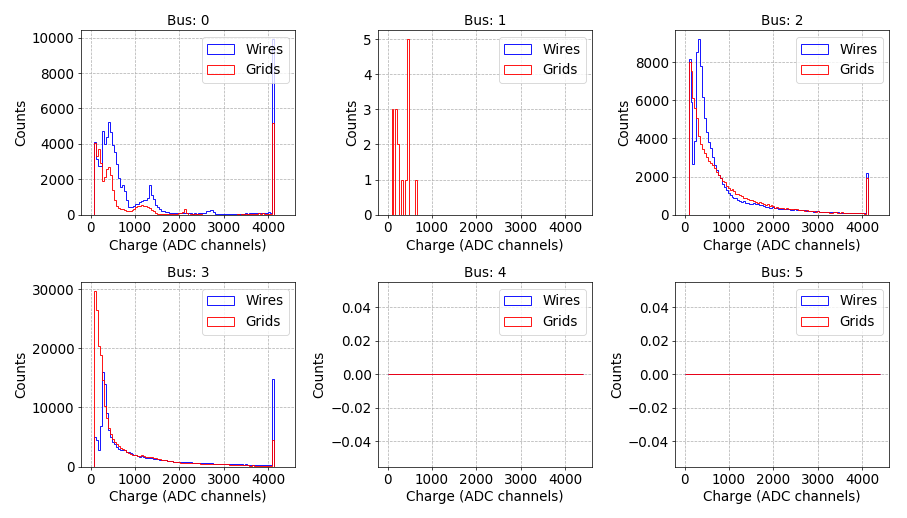

<IPython.core.display.Javascript object>


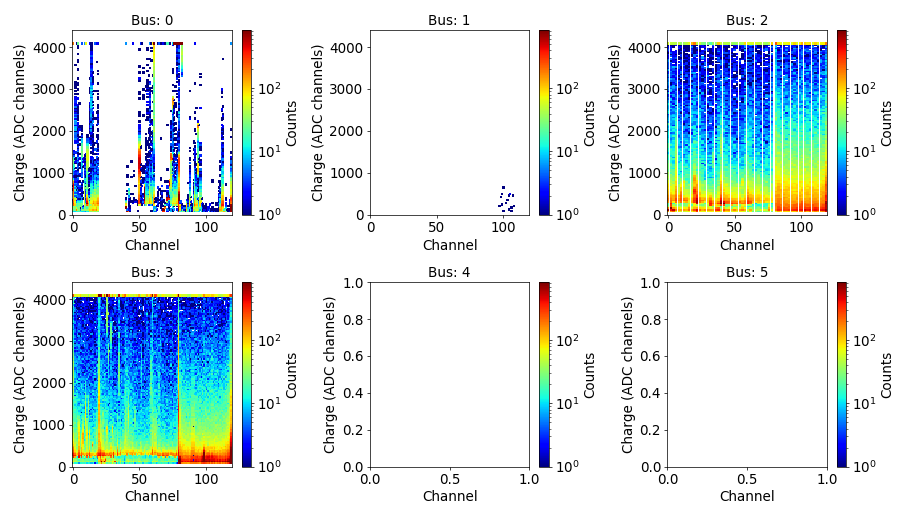

<IPython.core.display.Javascript object>


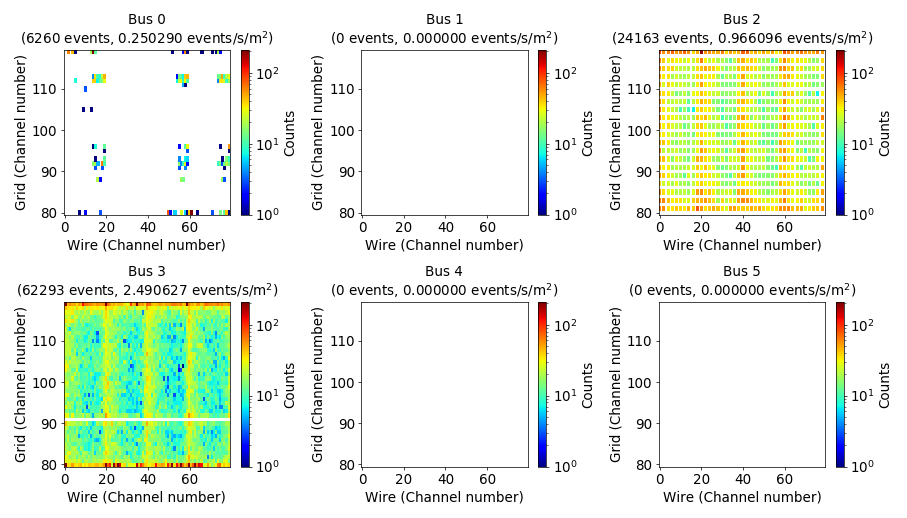

<IPython.core.display.Javascript object>


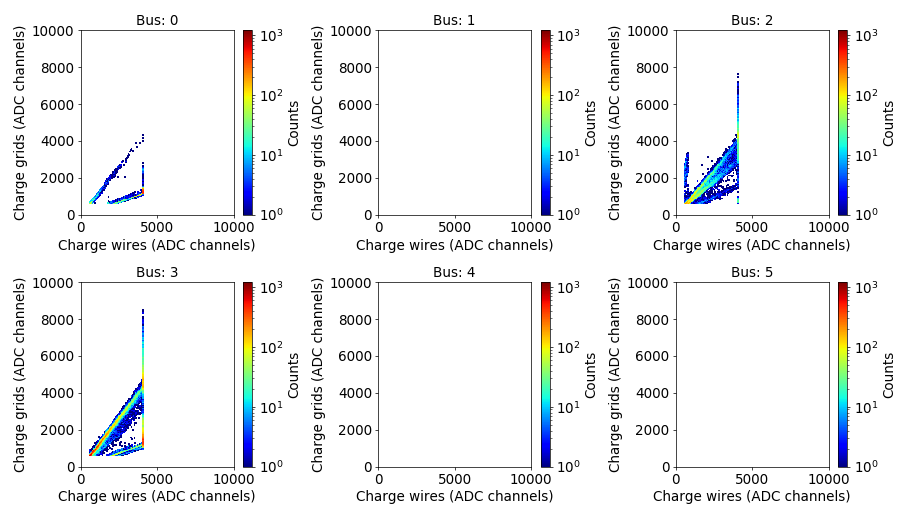

<IPython.core.display.Javascript object>


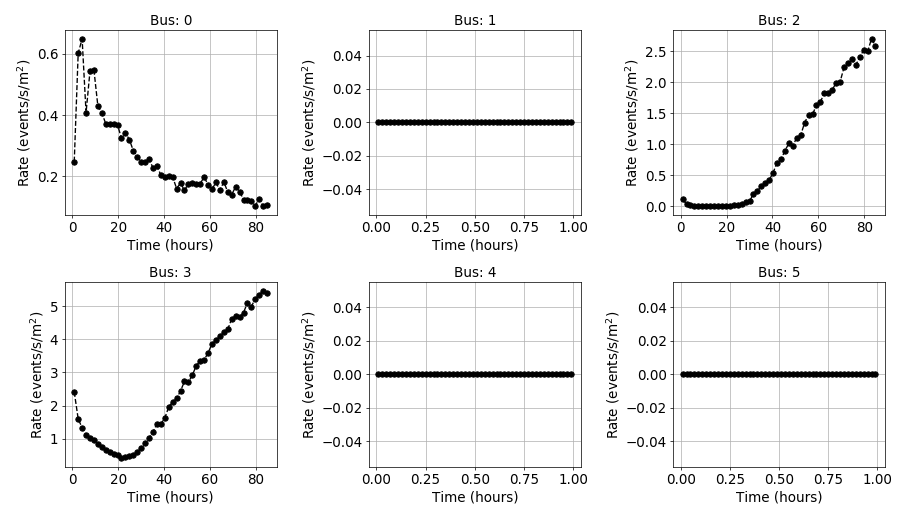

In [138]:
area = 0.0225*0.0225*4*40
plot_basic(clu_previous_run_4, ev_previous_run_4, mg_basic_filter, 0, 5, 2, area)

## previous_run_5 (SEQ.I, unshielded, horizontal)

/Users/alexanderbackis/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


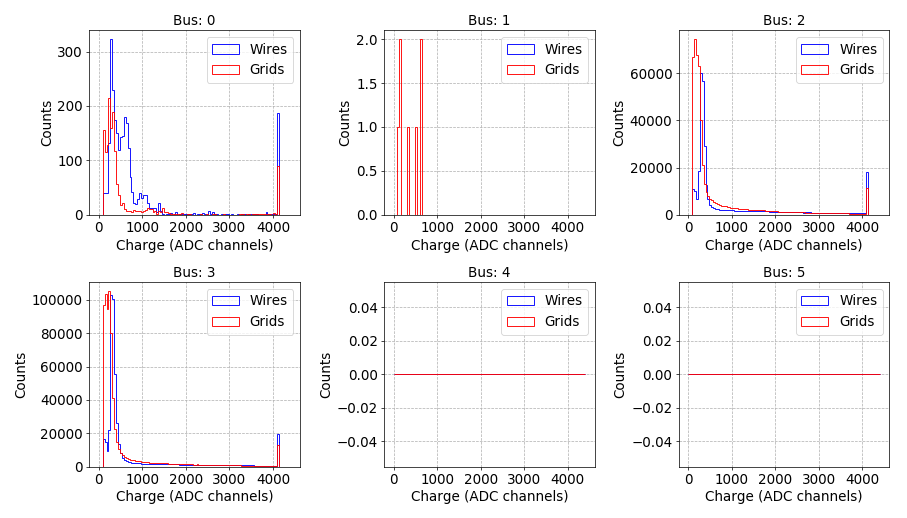

<IPython.core.display.Javascript object>


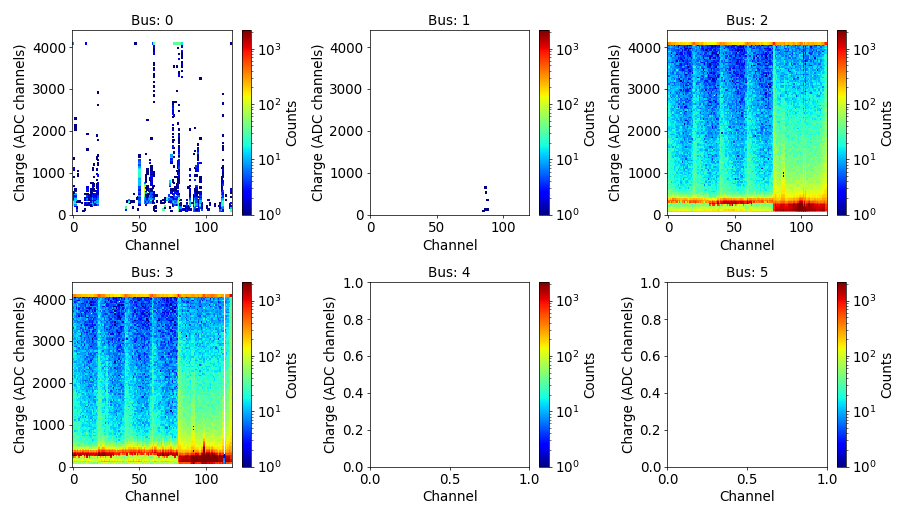

<IPython.core.display.Javascript object>


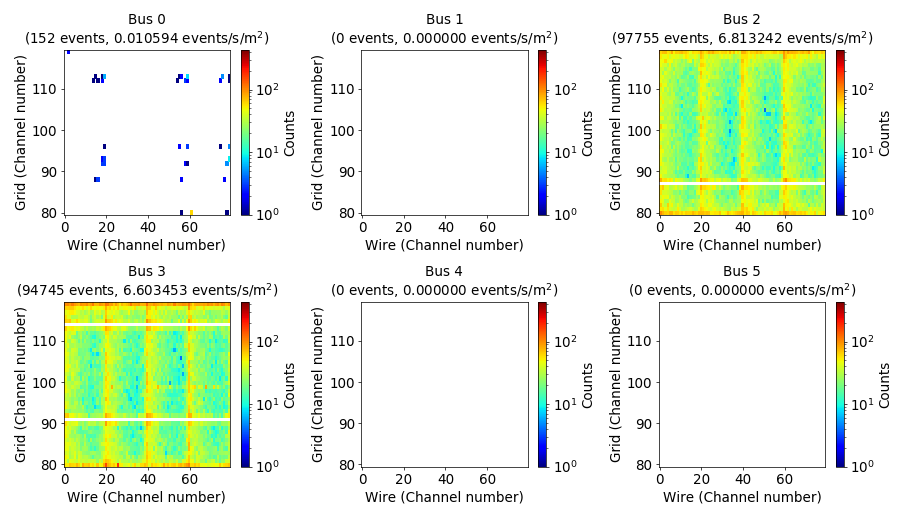

<IPython.core.display.Javascript object>


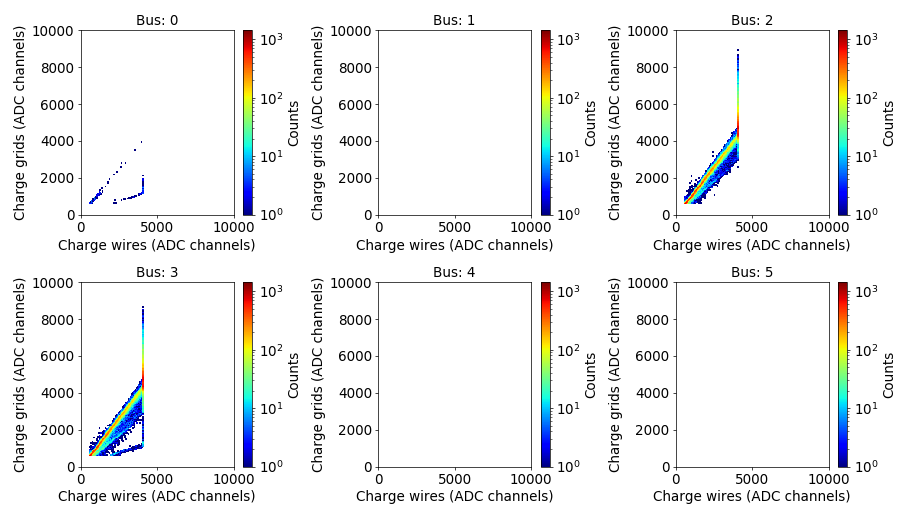

<IPython.core.display.Javascript object>


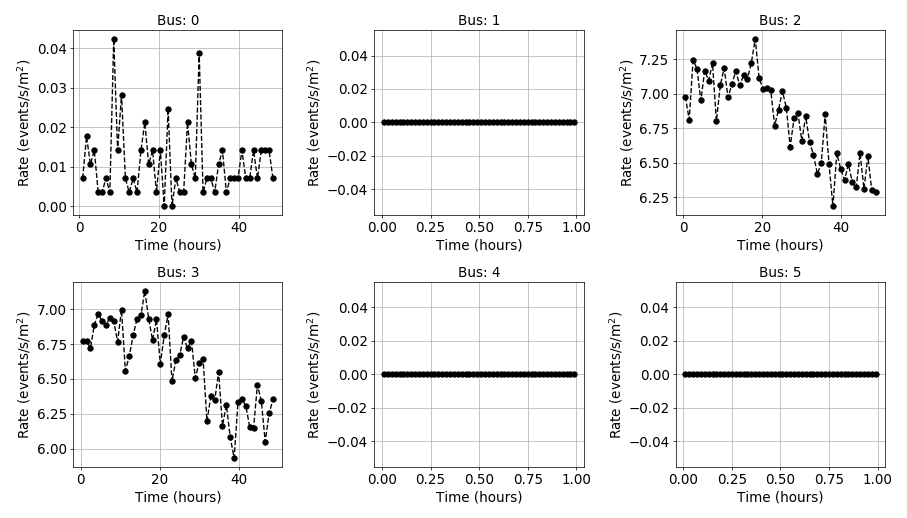

In [139]:
area = 0.0225*0.0225*4*40
plot_basic(clu_previous_run_5, ev_previous_run_5, mg_basic_filter, 0, 5, 2, area)

## previous_run_6 (SEQ.I, mirrobor shielding, horizontal)

<IPython.core.display.Javascript object>


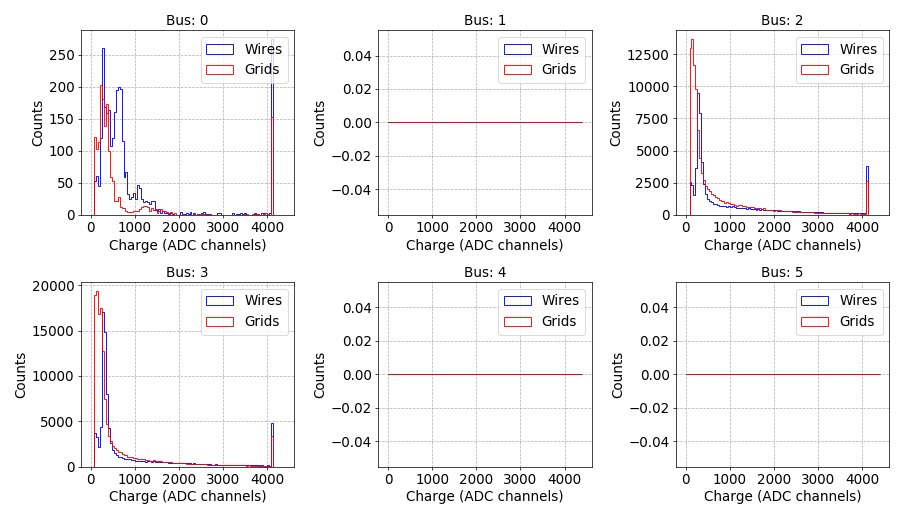

<IPython.core.display.Javascript object>


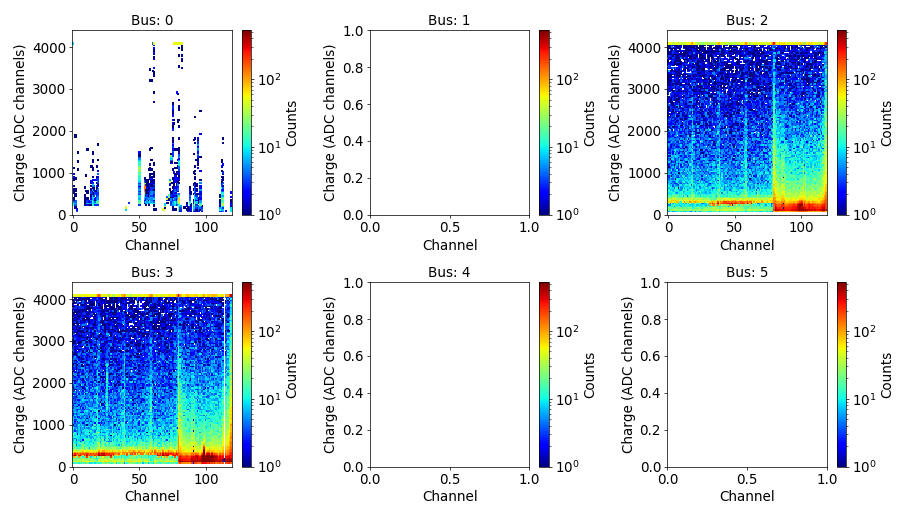

<IPython.core.display.Javascript object>


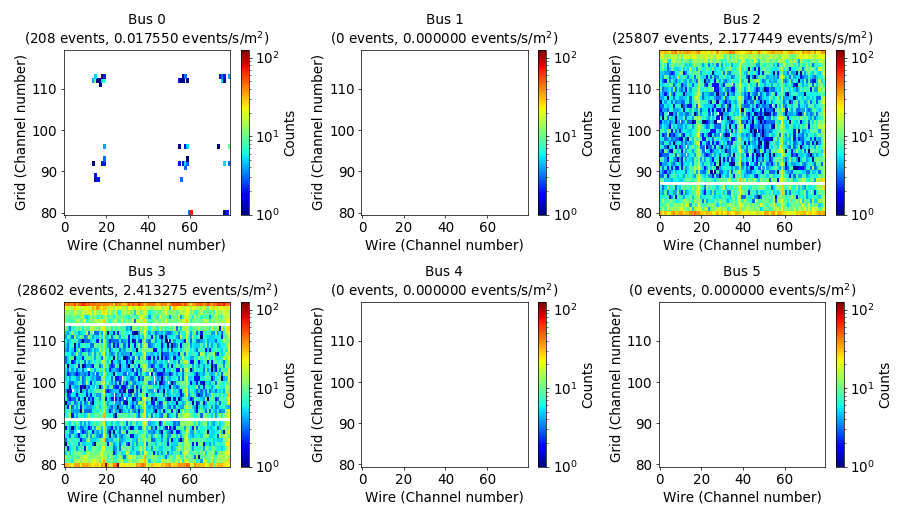

<IPython.core.display.Javascript object>


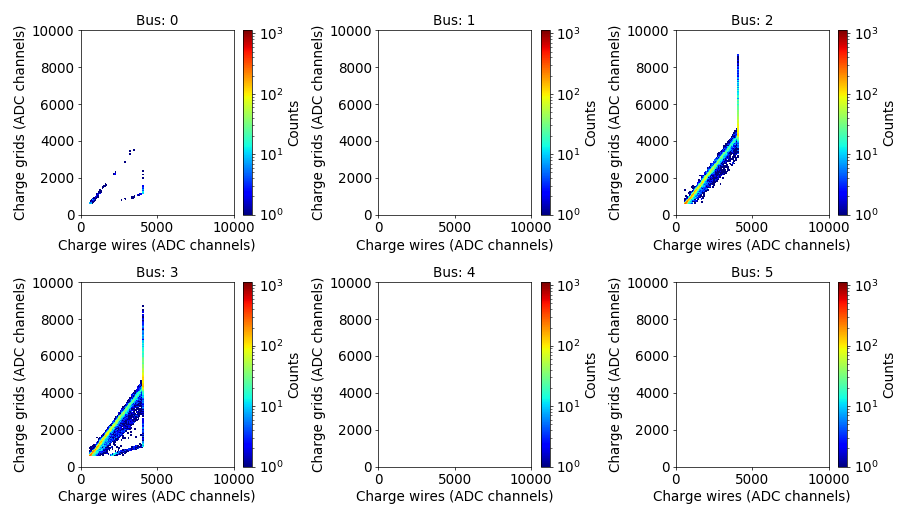

<IPython.core.display.Javascript object>


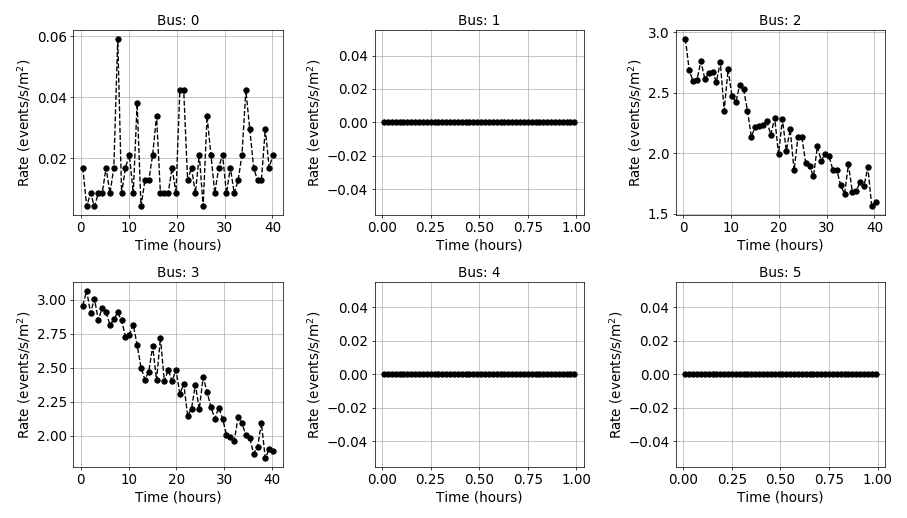

In [140]:
area = 0.0225*0.0225*4*40
plot_basic(clu_previous_run_6, ev_previous_run_6, mg_basic_filter, 0, 5, 2, area)

## previous_run_7 (SEQ.II, mirrorbor+polyethylene, horizontal)

<IPython.core.display.Javascript object>


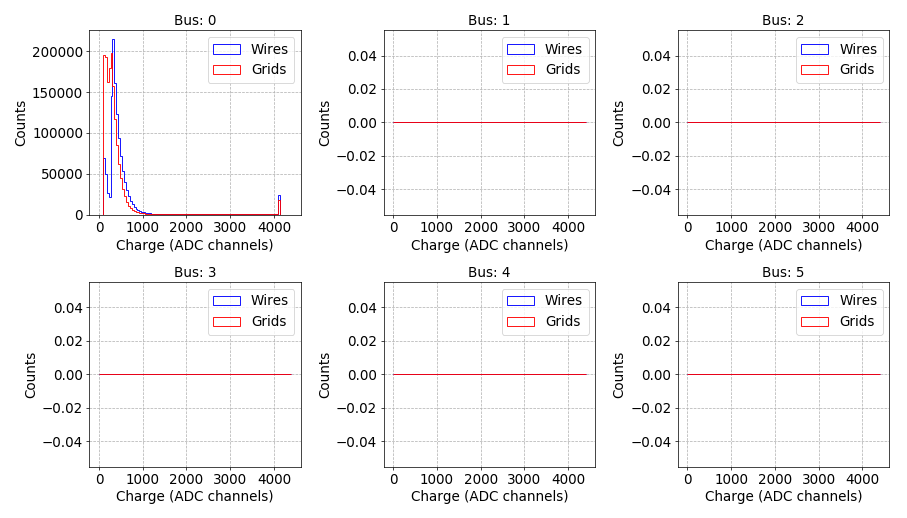

<IPython.core.display.Javascript object>


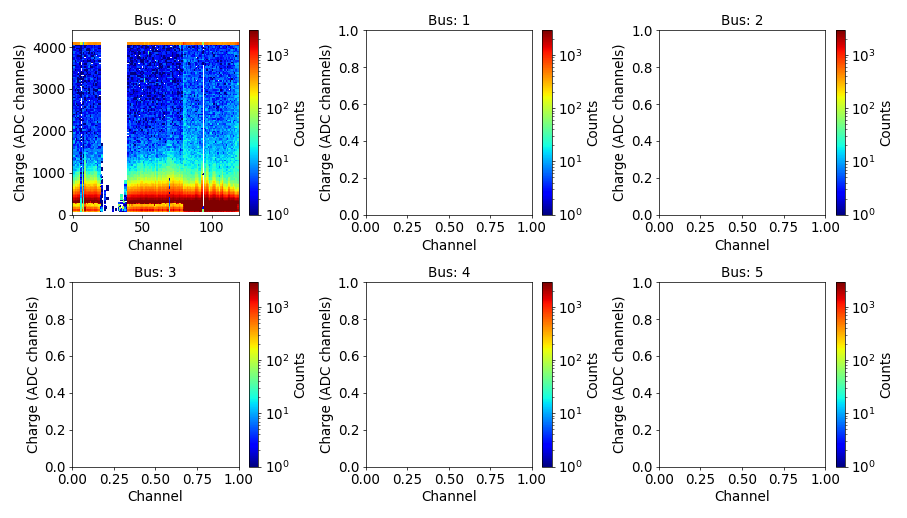

<IPython.core.display.Javascript object>


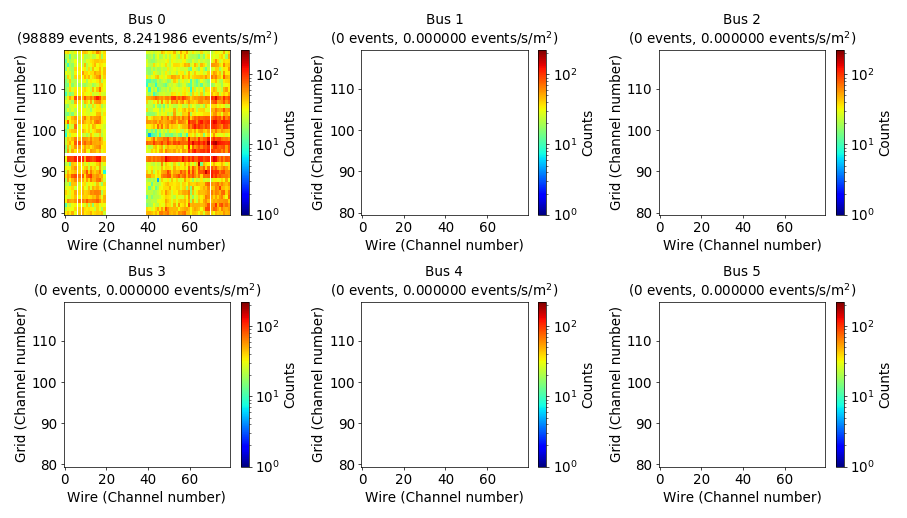

<IPython.core.display.Javascript object>


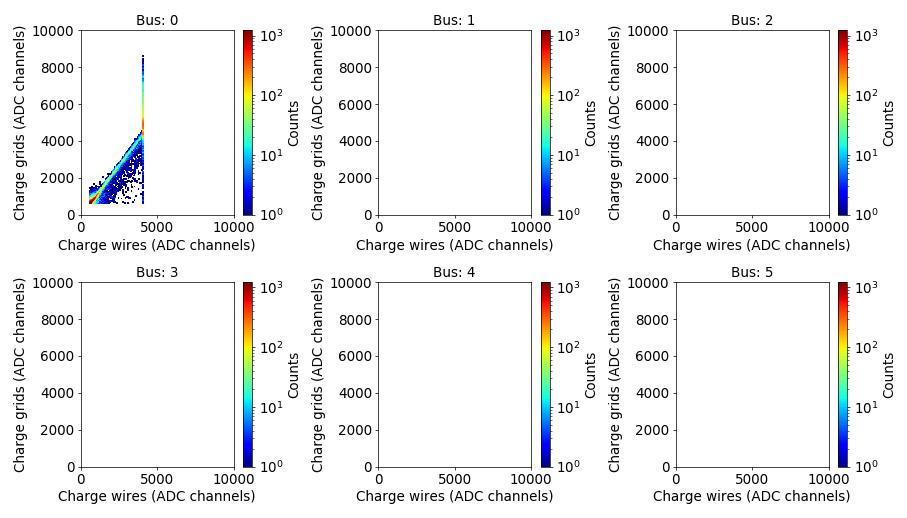

<IPython.core.display.Javascript object>


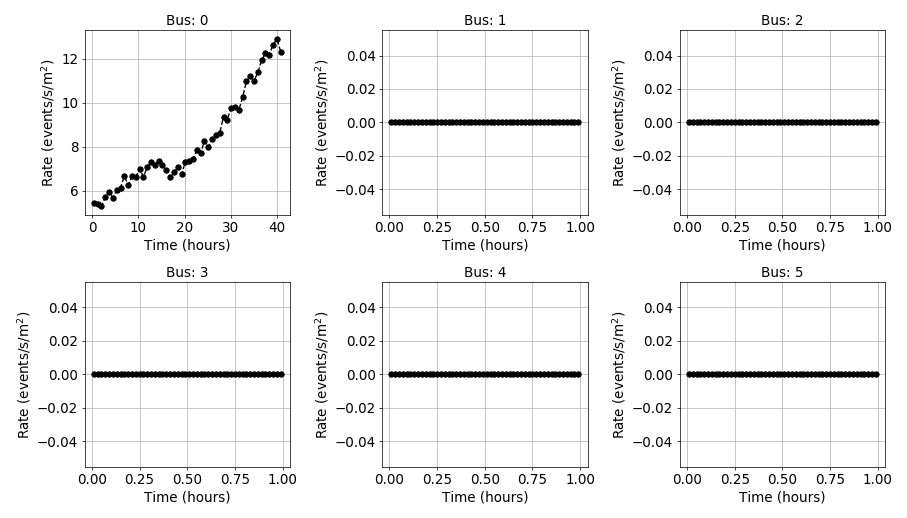

In [141]:
area = 0.0225*0.0225*4*40
plot_basic(clu_previous_run_7, ev_previous_run_7, mg_basic_filter, 0, 5, 2, area)

## previous_run_8 (SEQ.I, new cave, horizontal)

<IPython.core.display.Javascript object>


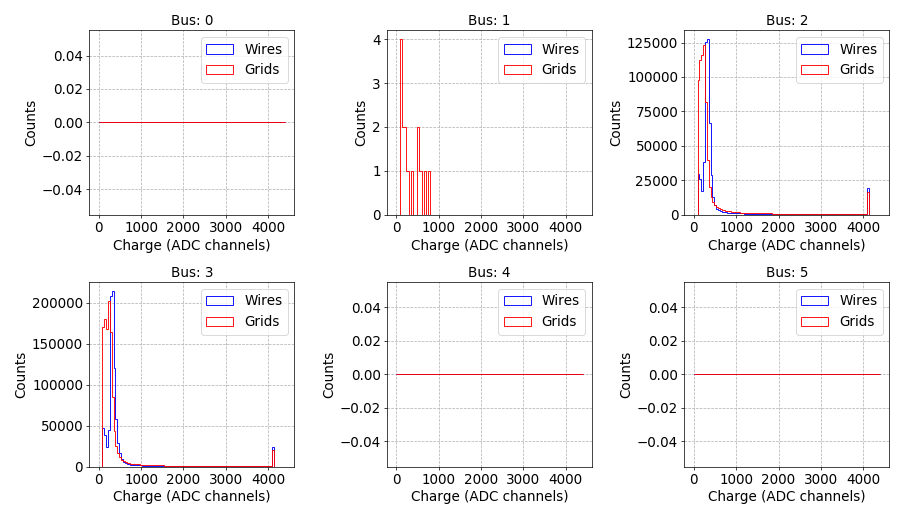

<IPython.core.display.Javascript object>


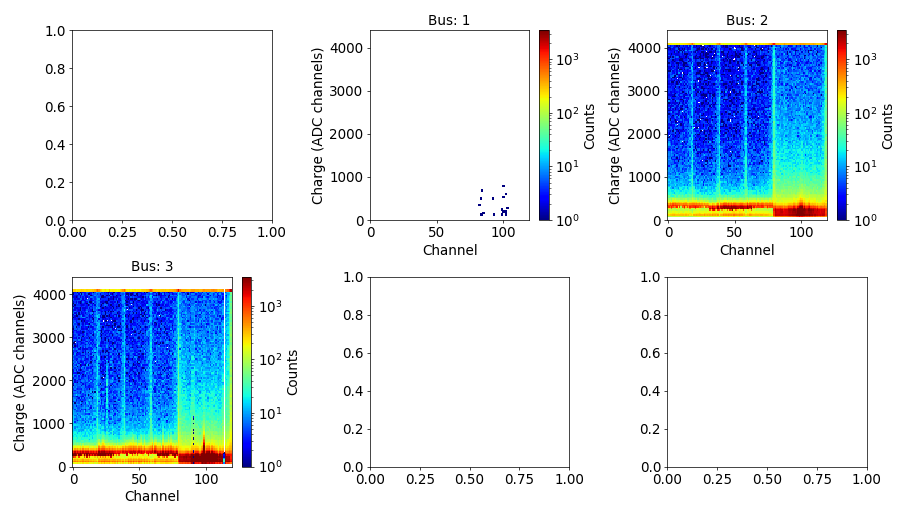

<IPython.core.display.Javascript object>


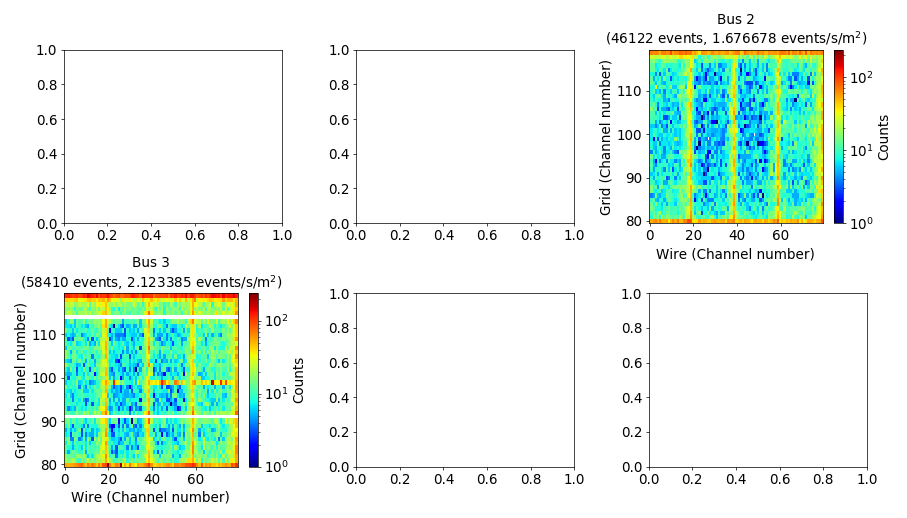

<IPython.core.display.Javascript object>


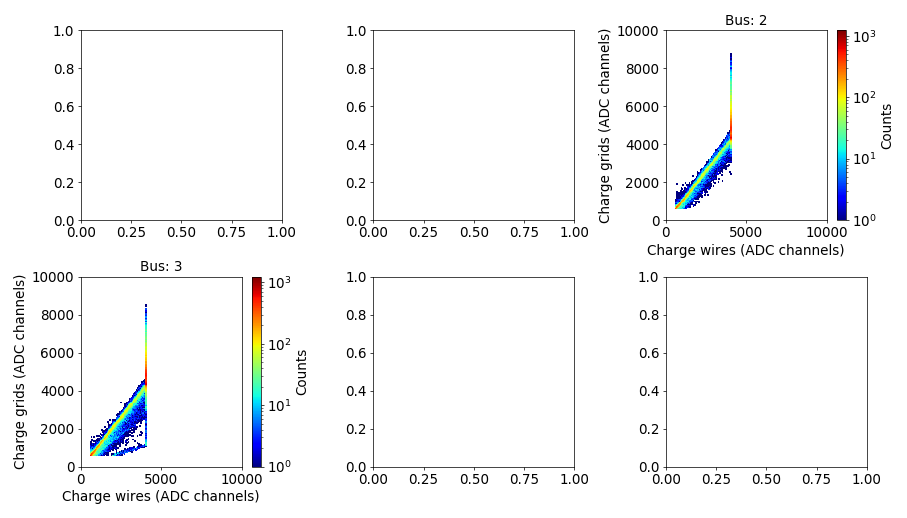

<IPython.core.display.Javascript object>


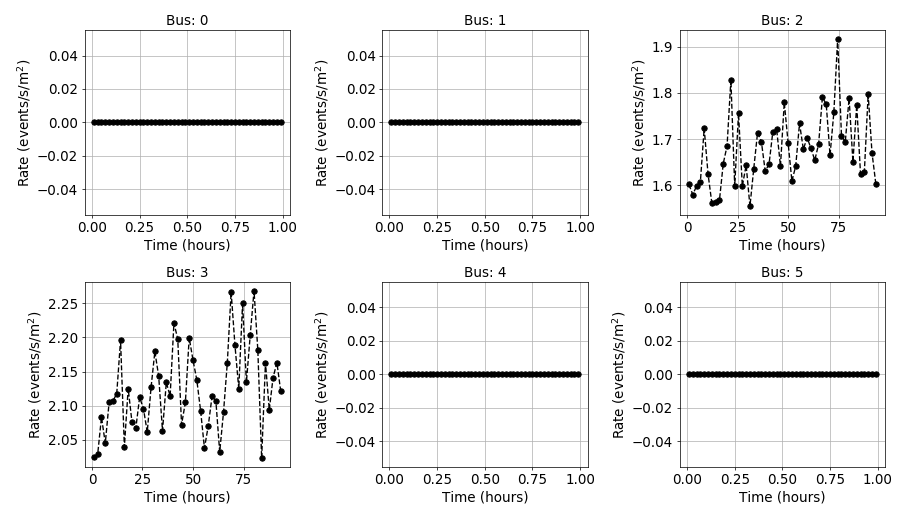

In [153]:
area = 0.0225*0.0225*4*40
plot_basic(clu_previous_run_8, ev_previous_run_8, mg_basic_filter, 0, 5, 2, area)

# 4. Utgård - preparations measurements

## utgard_run_1 (SEQ.I and SEQ.II, shielded with Mirrobor, horizontal)

<IPython.core.display.Javascript object>


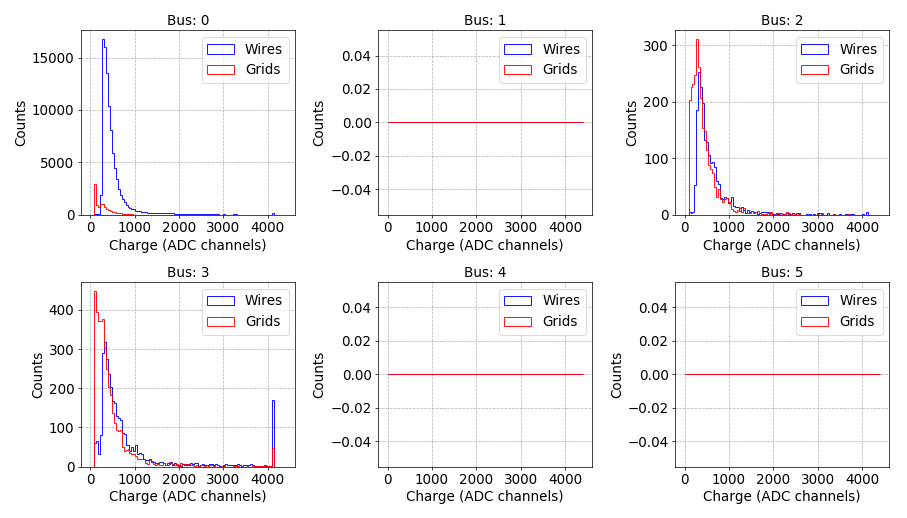

<IPython.core.display.Javascript object>


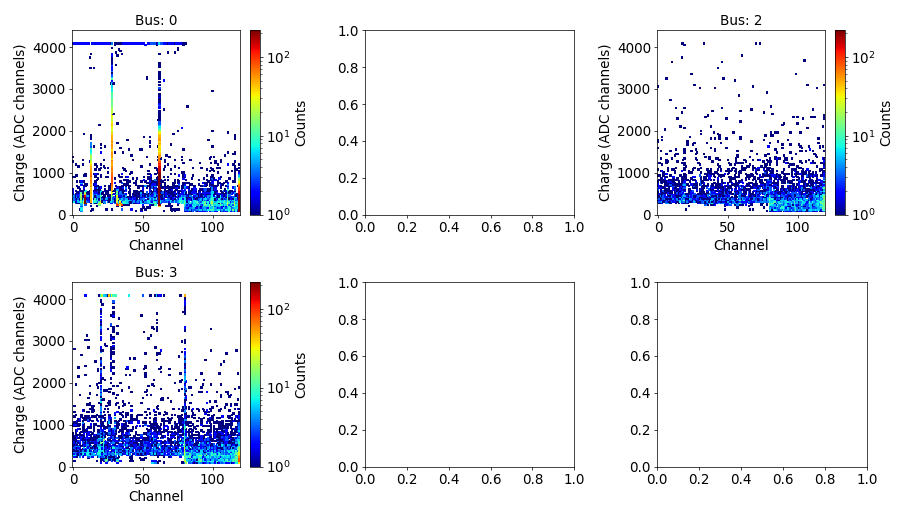

<IPython.core.display.Javascript object>


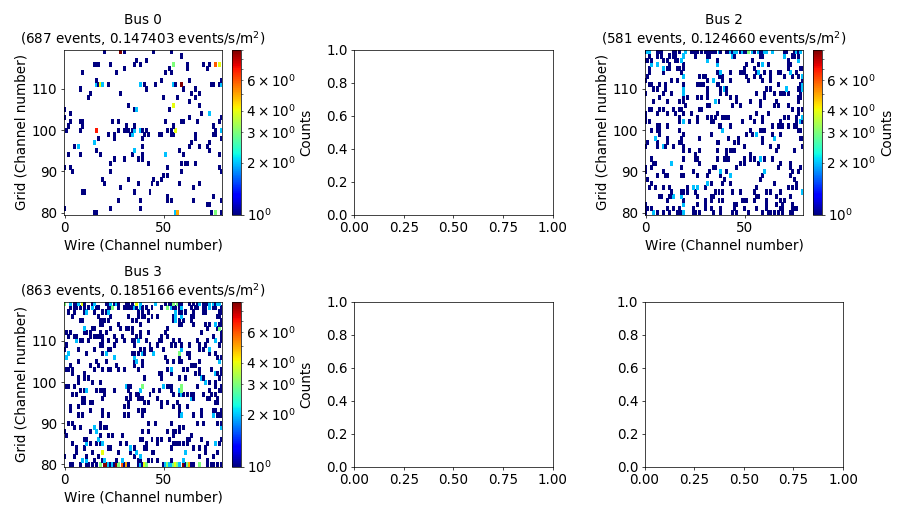

<IPython.core.display.Javascript object>


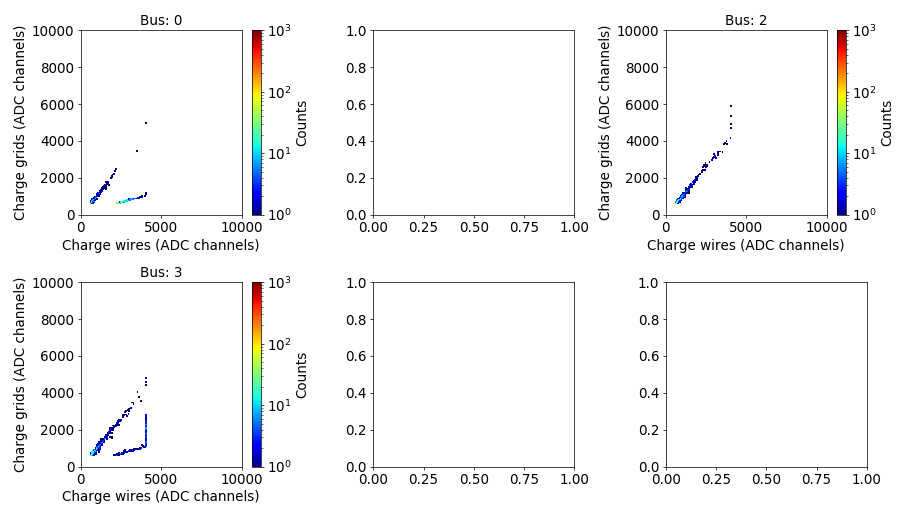

<IPython.core.display.Javascript object>


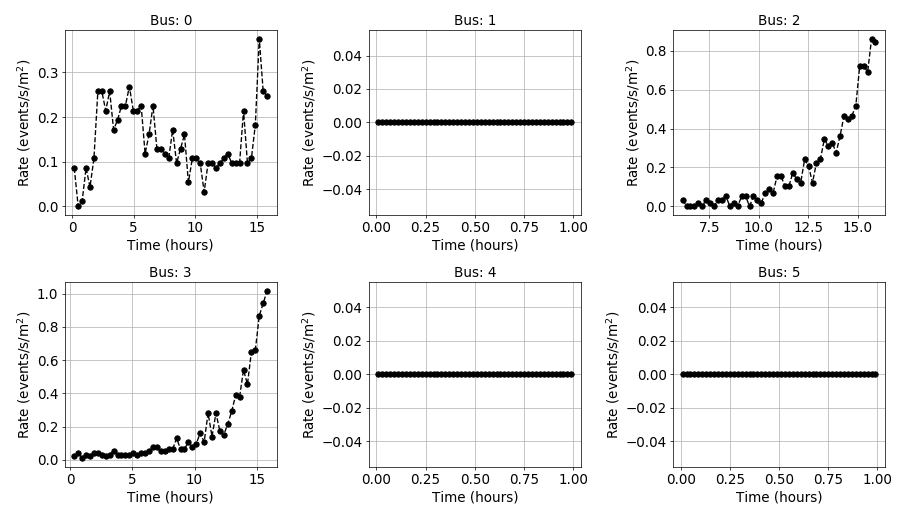

In [184]:
area = 0.0225*0.0225*4*40
plot_basic(clu_utgard_run_1, ev_utgard_run_1, mg_basic_filter, 0, 5, 2, area)

## utgard_run_2 (SEQ.I and SEQ.II, shielded with Mirrobor, horizontal)

<IPython.core.display.Javascript object>


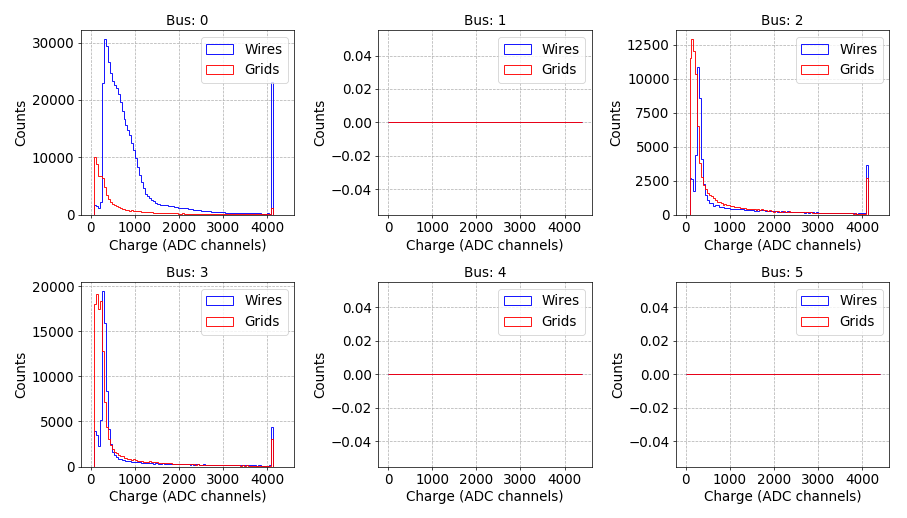

<IPython.core.display.Javascript object>


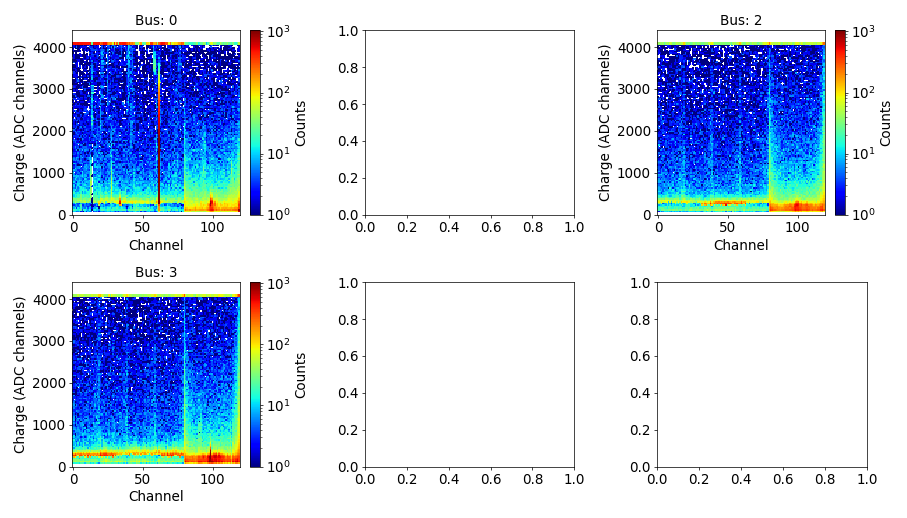

<IPython.core.display.Javascript object>


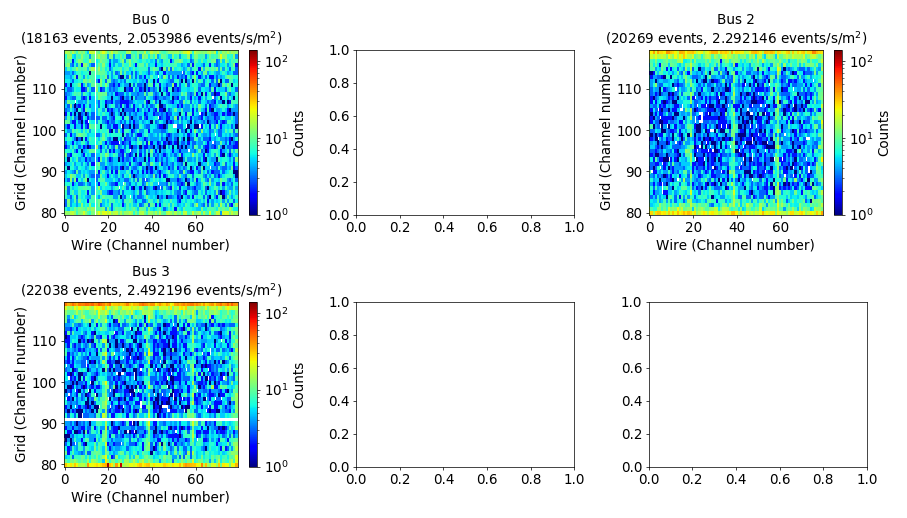

<IPython.core.display.Javascript object>


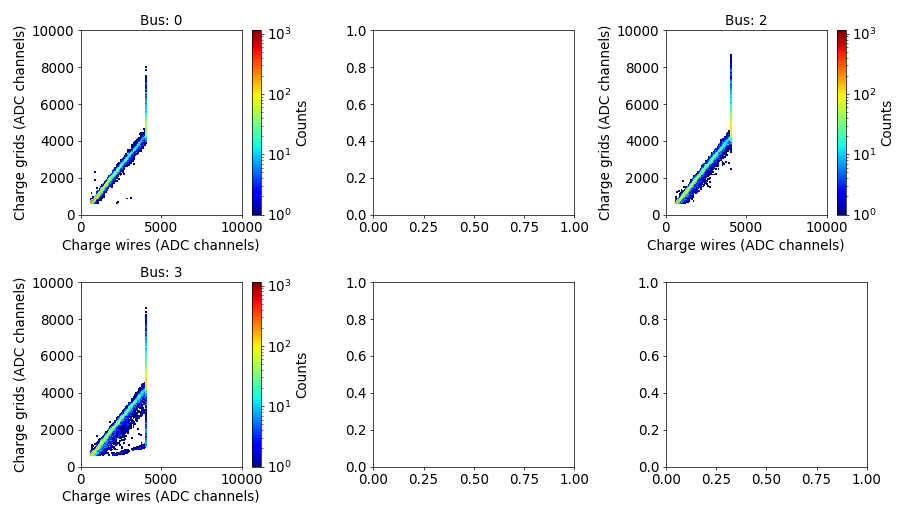

<IPython.core.display.Javascript object>


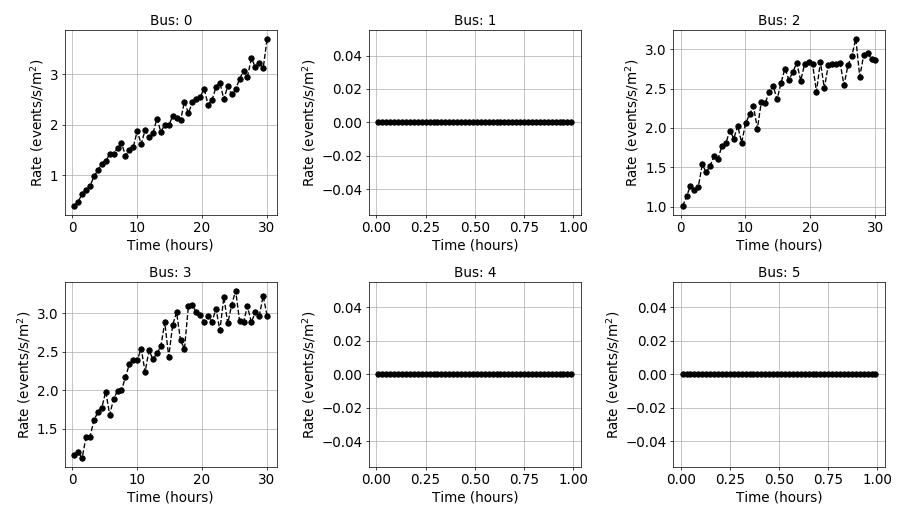

In [189]:
area = 0.0225*0.0225*4*40
plot_basic(clu_utgard_run_2, ev_utgard_run_2, mg_basic_filter, 0, 5, 2, area)

## utgard_run_3 (SEQ.I and SEQ.II, unshielded, horizontal)

<IPython.core.display.Javascript object>


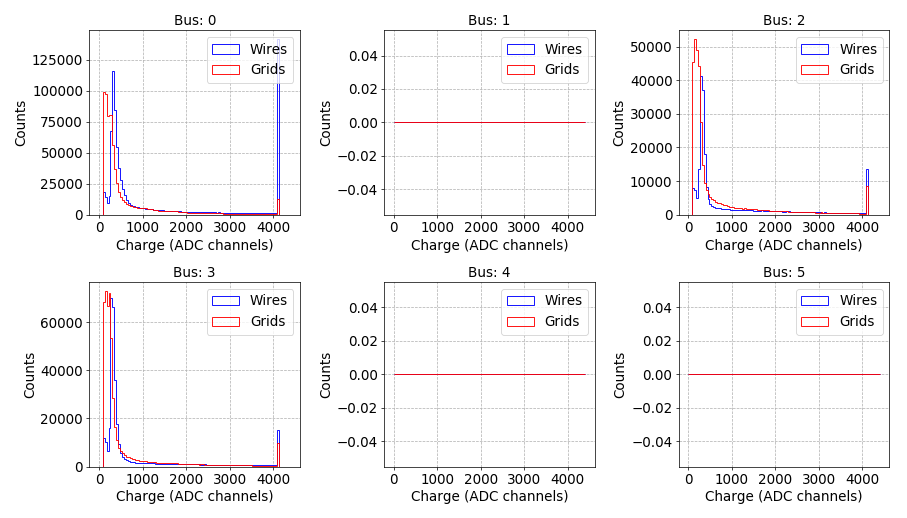

<IPython.core.display.Javascript object>


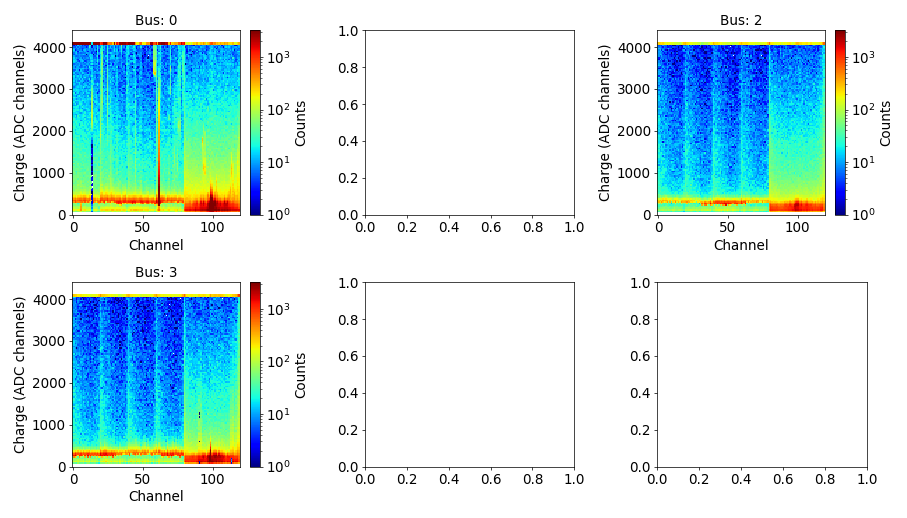

<IPython.core.display.Javascript object>


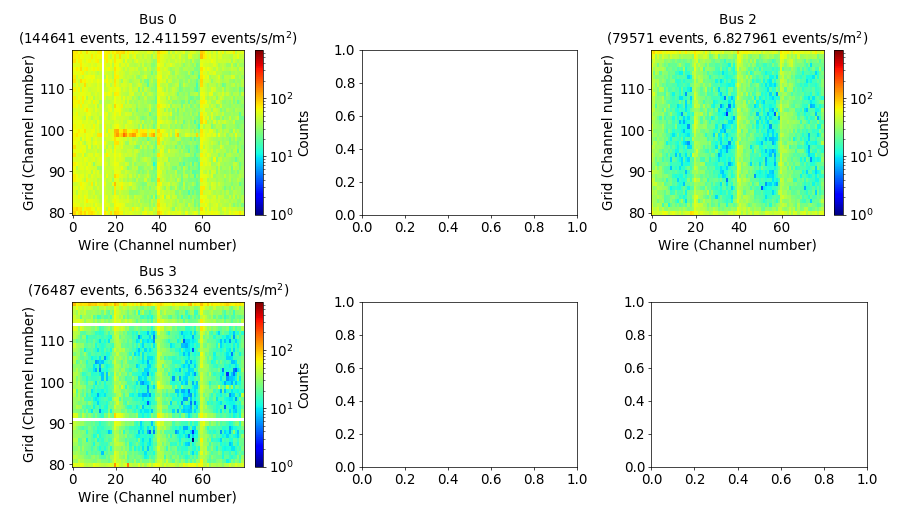

<IPython.core.display.Javascript object>


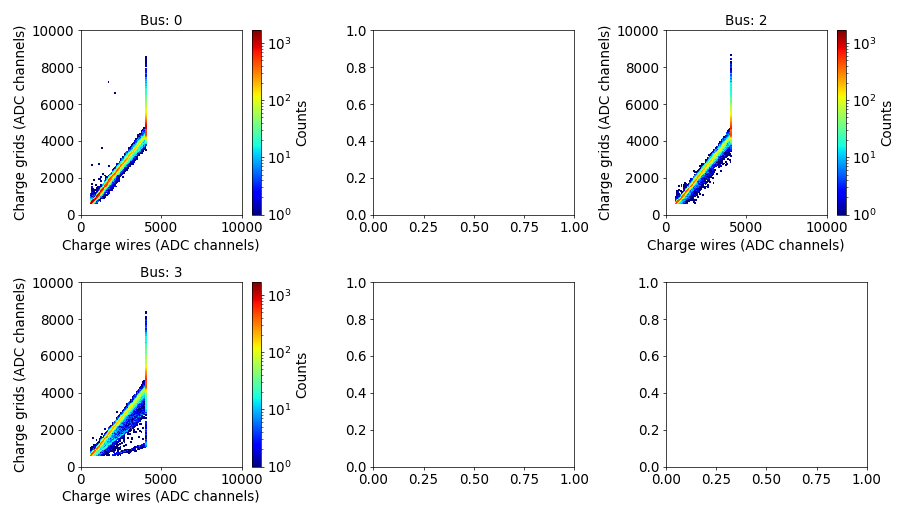

<IPython.core.display.Javascript object>


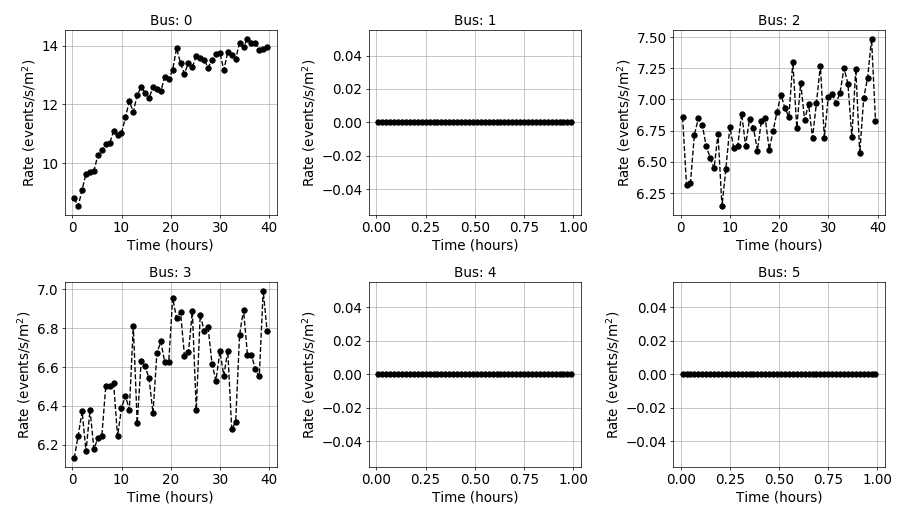

In [186]:
area = 0.0225*0.0225*4*40
plot_basic(clu_utgard_run_3, ev_utgard_run_3, mg_basic_filter, 0, 5, 2, area)